# 強化学習のサンプル効率の下界

参考

* [Reinforcement Learning: Theory and Algorithms](https://rltheorybook.github.io/)の５章

強化学習はどれくらいのサンプル数があれば最適方策が求まるのでしょうか？「最低でも何個」必要になるかがわかると、アルゴリズムや問題設定の設計を見積もりやすくなります。
今回は「最低でも何個」を調べるアプローチについて見ていきましょう。　

特に、次の２つについて見ていきます：

* Agnostic Learning：何らかの仮説集合に対して、その中から最良な仮説を見つけるために必要なサンプル効率はいくつか？
* Linearly realizable values or policies：$d$-次元の特徴ベクトルが与えられ、最適価値関数が線形に表せる or 最適方策が線形にパラメータ化されているとします。このとき、$d$に依存するが、$S$や$A$に非依存なサンプル効率を達成することはできるのでしょうか？

## Agnostic Learning

**表記**

* 仮説集合：$\mathcal{H}$
    * $f\in \mathcal{H}$に対して方策$\pi_f:\mathcal{S}\to\mathcal{A}$を割り当てる
* 方策の集合：$\Pi=\left\{\pi_f \mid f \in \mathcal{H}\right\}$
* Agnostic Learningの目標：$\max _{\pi \in \Pi} \mathbb{E}_{s_0 \sim \mu} V^\pi\left(s_0\right)$


### 二値分類問題

Agnostic learningのサンプル効率を見る前に、二値分類問題（$H=1$, $|\mathcal{A}|=2$, $\mathrm{label}(s)=a$のとき$r(s, a)=1$）のサンプル効率で練習してみましょう。
* ClassifierのDomain：$\mathcal{X}$（$\mathcal{S}$のアナロジー）
* $N$個のデータ：$\left(x_i, y_i\right)_{i=1}^N$
    * $x_i \in \mathcal{X}$, $y_i \in \{0, 1\}$
* $h \in \mathcal{H}: \mathcal{X} \rightarrow\{0,1\}$
* $\mathbf{1}(h(x) \neq y)$：$h(x)=y$なら０、それ以外で１を返す
* $\widehat{h}=\arg \min _{h \in \mathcal{H}} \widehat{\operatorname{err}}(h)$

次の経験損失と真の損失を考えます。
$$\widehat{\operatorname{err}}(h)=\frac{1}{N} \sum_{i=1}^N \mathbf{1}\left(h\left(x_i\right) \neq y_i\right), \quad \operatorname{err}(h)=\mathbb{E}_{(X, Y) \sim D} \mathbf{1}(h(X) \neq Y)$$

これに対して、Hoeffdingの不等式を使えば
$$
|\operatorname{err}(h)-\widehat{\operatorname{err}}(h)| \leq \sqrt{\frac{1}{2 N} \log \frac{2}{\delta}}
$$

が確率$1-\delta$以上で成立します。Union Boundを使えば、次の「オッカムの剃刀」バウンドが簡単に導出されます：

---

**オッカムの剃刀**

$\mathcal{H}$が有限のとき、

$$
\operatorname{err}(\widehat{h}) \leq \min _{h \in \mathcal{H}} \operatorname{err}(h)+\sqrt{\frac{2}{N} \log \frac{2|\mathcal{H}|}{\delta}}
$$

とくに、$N \geq \frac{2 \log \frac{2|\mathcal{H}|}{\delta}}{\epsilon^2}$ならば、

$$\operatorname{err}(\widehat{h}) \leq \min _{h \in \mathcal{H}} \operatorname{err}(h)+\epsilon$$

が成り立つ。よく見ると、これは入力のサイズ$\mathcal{X}$に依存していないことがわかります。

---

### 強化学習におけるオッカムの剃刀

オッカムの剃刀の強化学習版を考えてみましょう。$N$個の軌跡をランダムな方策（$\text {Unif }_\mathcal{A}$）を実行して収集したとします。
また、$\pi$を決定的な方策とします。このとき、　

$$
V_0^\pi(\mu)=|\mathcal{A}|^H \cdot \mathbb{E}_{\tau \sim \operatorname{Pr}_{\text {Unif }_\mathcal{A}}}\left[\mathbf{1}\left(\pi\left(s_0\right)=a_0, \ldots, \pi\left(s_{H-1}\right)=a_{H-1}\right) \sum_{h=0}^{H-1} r\left(s_h, a_h\right)\right]
$$

が成り立ちます。ここで、$\operatorname{Pr}_{\text {Unif }_\mathcal{A}}$は$\text {Unif }_\mathcal{A}$における$\tau=\left(s_0, a_0, r_0, \ldots s_{H-1}, a_{H-1}, r_{H-1}\right)$の分布です。
証明は簡単です。

$$
\begin{aligned}
V_0^\pi(\mu) & =\mathbb{E}_{\tau \sim \operatorname{Pr}_\pi}\left[\sum_{h=0}^{H-1} r_h\right] \\
& =\mathbb{E}_{\tau \sim \operatorname{Pr}_{\mathrm{Unif}_{\mathcal{A}}}}\left[\frac{\operatorname{Pr}_\pi(\tau)}{\operatorname{Pr}_{\mathrm{Unif}_{\mathcal{A}}}(\tau)} \sum_{h=0}^{H-1} r_h\right] \\
& =|\mathcal{A}|^H \cdot \mathbb{E}_{\tau \sim \operatorname{Pr}_{\mathrm{Unif}_{\mathcal{A}}}}\left[\mathbf{1}\left(\pi\left(s_0\right)=a_0, \ldots, \pi\left(s_{H-1}\right)=a_{H-1}\right) \sum_{h=0}^{H-1} r_h\right]
\end{aligned}
$$

ここで、最後の等式は$\text {Unif }_\mathcal{A}$が一様であることを利用しています。
この等式はつまり、ランダムな方策があれば任意の方策の価値を普遍推定できることを表しています。そこで、$N$個の軌跡を使って次のように方策の価値を推定した時を考えてみましょう：

$$
\widehat{V}_0^\pi(\mu)=\frac{|\mathcal{A}|^H}{N} \sum_{n=1}^N \mathbf{1}\left(\pi\left(s_0^n\right)=a_0^n, \ldots \pi\left(s_{H-1}^n\right)=a_{H-1}^n\right) \sum_{t=0}^{H-1} r\left(s_t^n, a_t^n\right)
$$
ここで、$\left(s_0^n, a_0^n, r_1^n, s_1^n, \ldots, s_{H-1}^n, a_{H-1}^n, r_{H-1}^n\right)$は$n$番目の軌跡です。
これに対して、次のバウンドが成立します：

---

**オッカムの剃刀（強化学習版）**

$\widehat{\pi}=\arg \max _{\pi \in \Pi} \widehat{V}_0^\pi(\mu)$とします。このとき、確率$1-\delta$以上で

$$
V_0^{\widehat{\pi}}(\mu) \geq \max _{\pi \in \Pi} V_0^\pi(\mu)-H|\mathcal{A}|^H \sqrt{\frac{2}{N} \log \frac{2|\Pi|}{\delta}} .
$$

が成立します。証明は簡単です。まず、$|\mathcal{A}|^H \mathbf{1}\left(\pi\left(s_0^n\right)=a_0^n, \ldots \pi\left(s_{H-1}^n\right)=a_{H-1}^n\right) \sum_{t=0}^{H-1} r\left(s_t^n, a_t^n\right)$が$H|\mathcal{A}^H$でバウンドされることに注意します。
後はオッカムの剃刀の証明と同じです。

また、$N \geq H|\mathcal{A}|^H \frac{2 \log (2|\Pi| / \delta)}{\epsilon^2}$のとき、確率$1-\delta$以上で$V_0^{\widehat{\pi}}\left(s_0\right) \geq \max _{\pi \in \Pi} V_0^\pi\left(s_0\right)-\epsilon$が成立します。

---

ここから何がわかるでしょうか？Agnostic learningでは状態数に非依存なサンプル効率で学習ができますが、そのサンプル効率はホライゾンに指数的に依存していることがわかります。後で見ますが、これは更に仮定を置かなければ回避できません。


TODO: 今までは$\mathcal{H}$が有限の場合のみ対応していましたが、無限の場合でもVC次元を使えば対処できます。



## サンプル効率の下界

上のオッカムの剃刀で見たような$O(\log |\Pi|)$に依存したサンプル効率は、実はこれ以上の仮定を置かなければ、ホライゾンに指数依存であることは回避できません。これを見てみましょう。

---

**Agnostic Learningの下界（Generative Modelあり）**

アルゴリズム$A$はgenerative modelを使って良いとします。また、$\Pi$を$|\Pi|=|\mathcal{A}|^H$なる方策の集合とします。アルゴリズム$A$が次を満たすような方策を確率$1-\delta$以上で返すとします（この$\pi$は$\Pi$になくても構いません）：

$$
V_0^\pi(\mu) \geq \max _{\pi \in \Pi} V_0^\pi(\mu)-0.5
$$

このとき、$A$はこれを達成するために、最低$N \geq c|\mathcal{A}|^H$回はgenerative modelにクエリを投げる必要があるような$\Pi$が存在します。

これを満たすような$\Pi$を構築してみましょう。
$|\mathcal{A}|$分岐なバランス木を考えます（状態数$|\mathcal{A}|^H$かつ行動数$|\mathcal{A}|$です）。
また、方策のクラスとして、すべての$|\mathcal{A}|^H$個の方策を考えます。
また、報酬はどこかのリーフノードに単一で割り当てられているとします。

このとき、$\mathcal{A}^H$の中から当たりの方策を一つを見つけ出さない限り報酬の情報が得られないので、$|\mathcal{A}|^H$のサンプル効率がかかることがすぐわかります。

---

このようなMDPの図を下に描画しておきます。


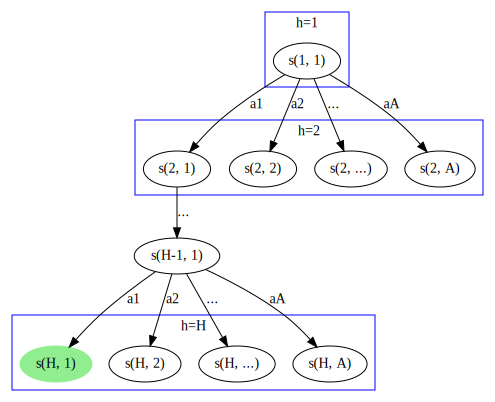

In [76]:
from graphviz import Digraph

g = Digraph('G')

# h=1
with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node('s(1, 1)')
    c.attr(label='h=1')

# h=2
with g.subgraph(name='cluster_2') as c:
    c.attr(color='blue')
    c.node('s(2, 1)')
    c.node('s(2, 2)')
    c.node('s(2, ...)')
    c.node('s(2, A)')
    c.attr(label='h=2')

g.node('s(1, 1)')
g.edge("s(1, 1)", "s(2, 1)",label="a1")
g.edge("s(1, 1)", "s(2, 2)",label="a2")
g.edge("s(1, 1)", "s(2, ...)",label="...")
g.edge("s(1, 1)", "s(2, A)",label="aA")

g.edge("s(2, 1)", "s(H-1, 1)", label="...")

# h=H
with g.subgraph(name='cluster_H') as c:
    c.attr(color='blue')
    c.node('s(H, 1)')
    c.node('s(H, 2)')
    c.node('s(H, ...)')
    c.node('s(H, A)')
    c.attr(label='h=H')

g.node("s(H, 1)", style="filled", color="lightgreen")
g.edge("s(H-1, 1)", "s(H, 1)",label="a1")
g.edge("s(H-1, 1)", "s(H, 2)",label="a2")
g.edge("s(H-1, 1)", "s(H, ...)",label="...")
g.edge("s(H-1, 1)", "s(H, A)",label="aA")

g

## Linear Realizability

さっきの仮定だけでは$H$に対して指数的なサンプル効率がかかってしまいました。次からより強い仮定を考えてみましょう。
まずは$Q^\pi$が線形近似可能である状況を考えてみます。実は、これから見るように、$Q^\pi$の線形近似可能性だけではサンプル効率は良くなりません。

以下ではoffline policy evaluationの設定を考えます。

* ステップ$h$でのデータの分布：$\left\{\mu_h\right\}_{h=0}^{H-1}$
    * $\mu_h \in \Delta\left(\mathcal{S}_h \times \mathcal{A}\right)$ 
* エージェントに与えられるデータセット：$\left\{D_h\right\}_{h=0}^{H-1}$
    * $D_h$は独立したサンプルで構築される: $\left(s, a, r, s^{\prime}\right) \in\mathcal{S}_h \times \mathcal{A} \times \mathbb{R} \times \mathcal{S}_{h+1}$
    * $(s, a) \sim \mu_h, r \sim r(s, a), s^{\prime} \sim P(s, a)$
    * エージェントは$\left\{D_h\right\}_{h=0}^{H-1}$を使って$V^\pi$を近似するのが目標
* 方策：$\pi: \mathcal{S} \rightarrow \Delta(\mathcal{A})$
* 特徴ベクトル：$\phi: \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}^d$

また、次の仮定を考えます：

---

**仮定：$Q^\pi$の線形実現可能性**

任意の方策$\pi$について、次を満たす$\theta_0^\pi, \ldots \theta_{H-1}^\pi \in \mathbb{R}^d$が存在する：

$$Q_h^\pi(s, a)=\left(\theta_h^\pi\right)^{\top} \phi(s, a)$$

この仮定は**全ての**方策が線形に実現可能という点で、結構強い仮定であることに注意しましょう。

---

---

**仮定：Coverage**

任意の$(s, a)$について、$\|\phi(s, a)\|_2 \leq 1$とします。また、任意の$h\in [H]$について、$\mu$は次を満たすとします：

$$\mathbb{E}_{(s, a) \sim \mu_h}\left[\phi(s, a) \phi(s, a)^{\top}\right]=\frac{1}{d} I$$

これはデータの分布$\mu_h$がD-optimal designであるという仮定と等価であることに注意しましょう。
また、対角行列の成分は固有値なので、この行列の最小の固有値は$1/d$です。
さらに、任意のデータ分布$\widetilde{\mu}_h$についての最小の固有値の最大値は$1/d$になります（$\|\phi(s, a)\|_2 \leq 1$なので$\sigma_{\min }\left(\mathbb{E}_{(s, a) \sim \widetilde{\mu}_h}\left[\phi(s, a) \phi(s, a)^{\top}\right]\right)$が成り立つためです）。

---

Coverageの仮定と線形実現性の仮定から、通常の最小二乗法で$Q_h^\pi$が良く近似できることが保証されています。しかし、実はこの仮定だけでは強化学習は効率よく解けません。

---

**定理： Exponential Lower Bound**

仮定：Coverageが成り立っているとします。また、方策と特徴ベクトルを入力として受けるアルゴリズムを考えます。
このとき、どんなアルゴリズムに対しても、次を満たすような実現可能性の仮定を満たすMDPが存在します。

「どんな方策$\pi: \mathcal{S} \rightarrow \Delta(\mathcal{A})$に対しても、確率$0.9$以上で$\pi$の価値を定数誤差で吐き出すために$\Omega\left((d / 2)^H\right)$のサンプルが必要になる。」

---

これは方策評価についての話ですが、簡単な例によって一般のOffline RLが最適方策を近似する場合についても成り立つことがわかります。
例えば、初期状態で行動$a_1$を選択し、報酬$0.5$を受け取って終了するとします。
一方、$a_2$を選択するとムズMDPに遷移するとします。
このとき、準最適性が$0.5$以下になるような方策を獲得するには、ムズMDPの方策を$0.5$以下の精度で評価しなければなりません。
よって、方策評価がちゃんとできないと最適方策もわかりません。

このムズMDPを構築してみましょう。

* $\hat{d}=d/2$
* 行動集合：$\mathcal{A}=\left\{a_1, a_2\right\}$
* $h$での状態集合（$\hat{d}+1$個）：$s_h^1, s_h^2, \ldots, s_h^{\hat{d}}$ and $s_h^{\hat{d}+1}$
* 任意の$h \in\{0,1, \ldots, H-2\}$と$c \in\{1,2, \ldots, \hat{d}+1\}$について、
$$
P\left(s \mid s_h^c, a\right)= \begin{cases}1 & s=s_{h+1}^{\hat{d}+1}, a=a_1 \\ 1 & s=s_{h+1}^c, a=a_2 \\ 0 & \text { else }\end{cases}
$$


## Linear MDP

* 参考
Linear MDPの下界を求めてみます。